# Hoja de trabajo 2
Diego Andrés Morales Aquino - 21762
Pablo Andrés Zamora Vásquez - 21780

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data = pd.read_csv('baseball_reference_2016_scrape.csv')

## Inciso 1

In [3]:
data.head()

,attendance,away_team,away_team_errors,away_team_hits,away_team_runs,boxscore_url,date,field_type,game_duration,game_type,home_team,home_team_errors,home_team_hits,home_team_runs,other_info_string,start_time,venue
0,"40,030']",New York Mets,1,7,3,https://www.baseball-reference.com/boxes/KCA/K...,"Sunday, April 3, 2016",NaN,: 3:13,"Night Game, on grass",Kansas City Royals,0,9,4,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 7:38 p.m. Local,: Kauffman Stadium
1,"21,621']",Philadelphia Phillies,0,5,2,https://www.baseball-reference.com/boxes/CIN/C...,"Wednesday, April 6, 2016",NaN,: 2:23,"Night Game, on grass",Cincinnati Reds,0,8,3,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 7:11 p.m. Local,: Great American Ball Park
2,"12,622']",Minnesota Twins,0,5,2,https://www.baseball-reference.com/boxes/BAL/B...,"Wednesday, April 6, 2016",NaN,: 3:11,"Night Game, on grass",Baltimore Orioles,0,9,4,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 7:07 p.m. Local,: Oriole Park at Camden Yards
3,"18,531']",Washington Nationals,0,8,3,https://www.baseball-reference.com/boxes/ATL/A...,"Wednesday, April 6, 2016",NaN,: 2:53,"Night Game, on grass",Atlanta Braves,1,8,1,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 7:10 p.m. Local,: Turner Field
4,"18,572']",Colorado Rockies,1,8,4,https://www.baseball-reference.com/boxes/ARI/A...,"Wednesday, April 6, 2016",NaN,: 2:39,"Day Game, on grass",Arizona Diamondbacks,0,8,3,"<!-- \n <div class=""section_content"" id=""d...",Start Time: 12:40 p.m. Local,: Chase Field


In [14]:
data.dtypes

attendance            object
away_team             object
away_team_errors       int64
away_team_hits         int64
away_team_runs         int64
boxscore_url          object
date                  object
field_type           float64
game_duration         object
game_type             object
home_team             object
home_team_errors       int64
home_team_hits         int64
home_team_runs         int64
other_info_string     object
start_time            object
venue                 object
dtype: object

### 1.3 Incluya los gráficos exploratorios siendo consecuentes con el tipo de variable que están representando

c:\Users\Pablo Zamora\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


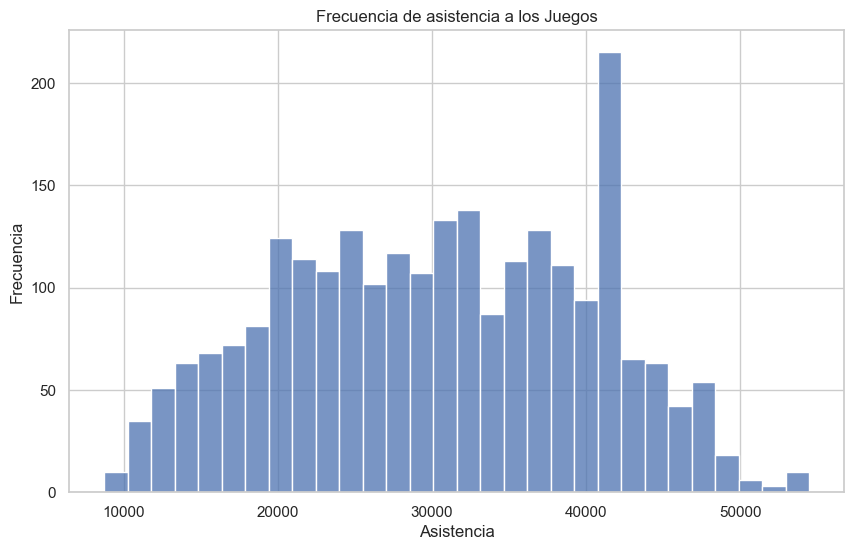

In [28]:
import seaborn as sns

data = pd.read_csv('baseball_reference_2016_scrape.csv')

# Frecuencia de asistencia a los juegos
# Limpiar la columna 'attendance'
data['attendance'] = pd.to_numeric(data['attendance'].str.replace('[^\d]', '', regex=True), errors='coerce')

# Establecer estilo
sns.set_theme(style="whitegrid")

# Histograma de asistencia
plt.figure(figsize=(10, 6))
sns.histplot(data['attendance'], kde=False, bins=30)
plt.title('Frecuencia de asistencia a los Juegos')
plt.xlabel('Asistencia')
plt.ylabel('Frecuencia')
plt.show()

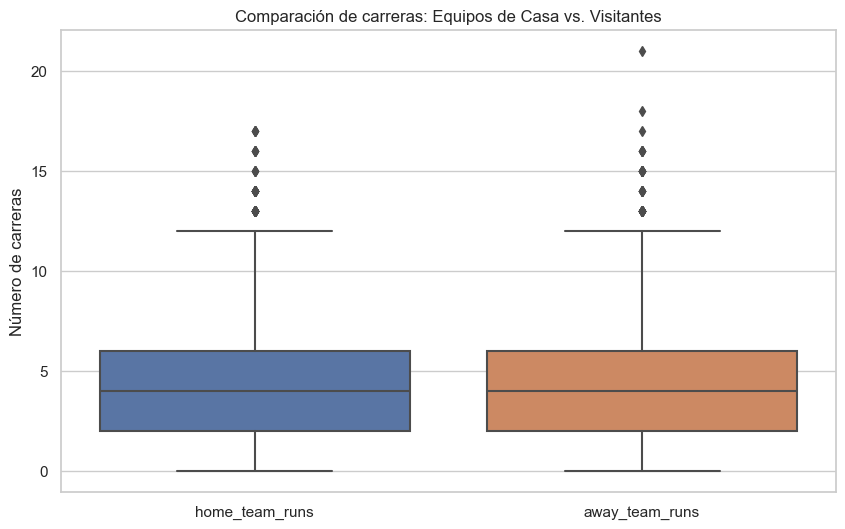

In [29]:
# Comparación entre errores que realiza el equipo local y que realiza el equipo visitante
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['home_team_runs', 'away_team_runs']])
plt.title('Comparación de carreras: Equipos de Casa vs. Visitantes')
plt.ylabel('Número de carreras')
plt.show()

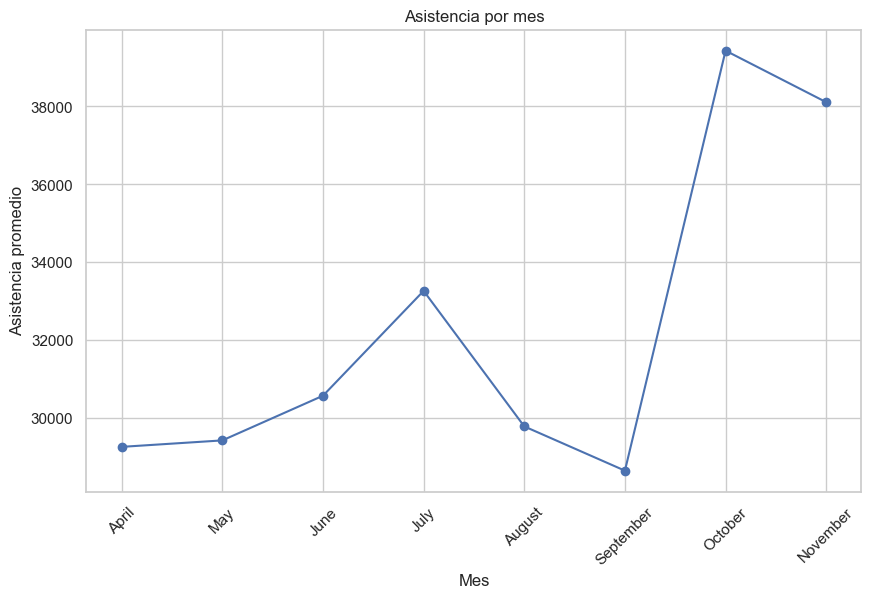

In [30]:
# Meses vs asistencia

data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['month_name'] = data['date'].dt.month_name()

# Obtener promedio del total de asistencia de cada mes
monthly_attendance = data.groupby('month_name')['attendance'].sum().reset_index()
monthly_attendance = data.groupby('month_name')['attendance'].mean().reset_index()

# Asegurarse que se muestren en orden cronológico y no alfabético
months_order = ["January", "February", "March", "April", "May", "June", 
                "July", "August", "September", "October", "November", "December"]
monthly_attendance['month_name'] = pd.Categorical(monthly_attendance['month_name'], categories=months_order, ordered=True)
monthly_attendance = monthly_attendance.sort_values('month_name')

plt.figure(figsize=(10, 6))
plt.plot(monthly_attendance['month_name'], monthly_attendance['attendance'], marker='o')
plt.title('Asistencia por mes')
plt.xlabel('Mes')
plt.ylabel('Asistencia promedio')
plt.xticks(rotation=45) 
plt.grid(True)
plt.show()

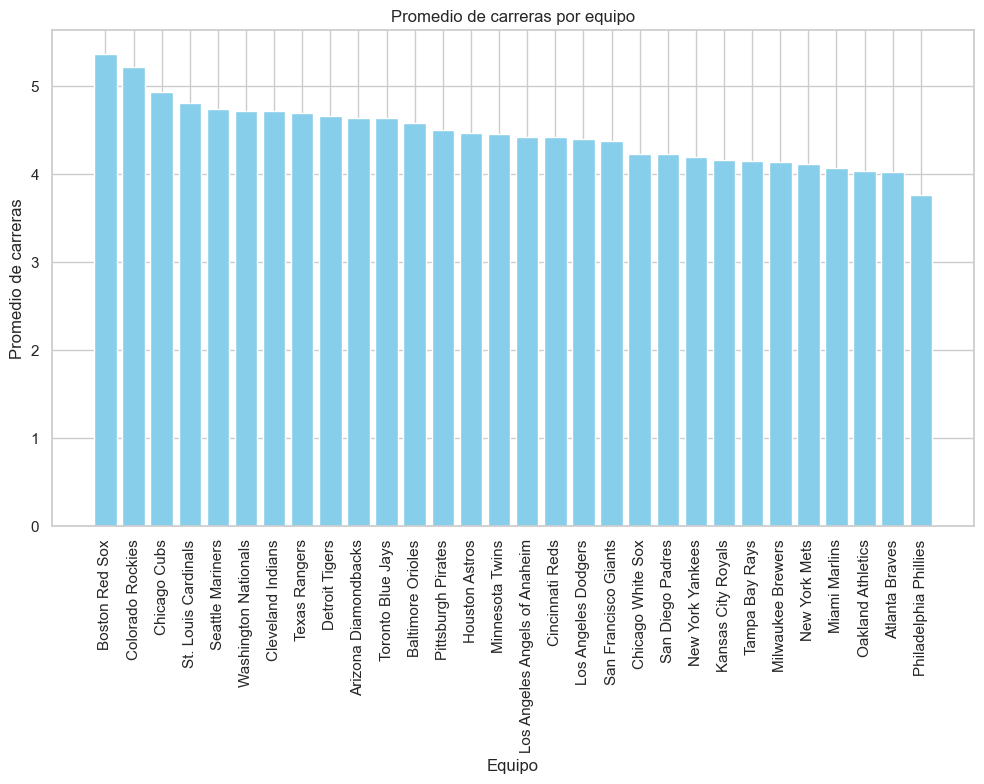

In [31]:
# Promedio de carreras realizadas por equipo
avg_runs_home = data.groupby('home_team')['home_team_runs'].mean().reset_index(name='avg_runs_as_home')
avg_runs_away = data.groupby('away_team')['away_team_runs'].mean().reset_index(name='avg_runs_as_away')

# Renombrar las columnas para que coincidan y puedan ser unificadas fácilmente
avg_runs_home.rename(columns={'home_team': 'team', 'avg_runs_as_home': 'avg_runs'}, inplace=True)
avg_runs_away.rename(columns={'away_team': 'team', 'avg_runs_as_away': 'avg_runs'}, inplace=True)

# Combinar los DataFrames
combined = pd.concat([avg_runs_home, avg_runs_away])

# Calcular el promedio de carreras por equipo
avg_runs_per_team = combined.groupby('team')['avg_runs'].mean().reset_index(name='avg_runs')

# Ordena los datos por el promedio de carreras para una mejor visualización
avg_runs_per_team_sorted = avg_runs_per_team.sort_values('avg_runs', ascending=False)

# Crear una figura y un eje para el gráfico
plt.figure(figsize=(10, 8))

# Gráfico de barras
plt.bar(avg_runs_per_team_sorted['team'], avg_runs_per_team_sorted['avg_runs'], color='skyblue')

plt.title('Promedio de carreras por equipo')
plt.xlabel('Equipo')
plt.ylabel('Promedio de carreras')
plt.xticks(rotation=90)  # Rota las etiquetas del eje x para mejor legibilidad

# Mostrarel gráfico
plt.tight_layout() 
plt.show()


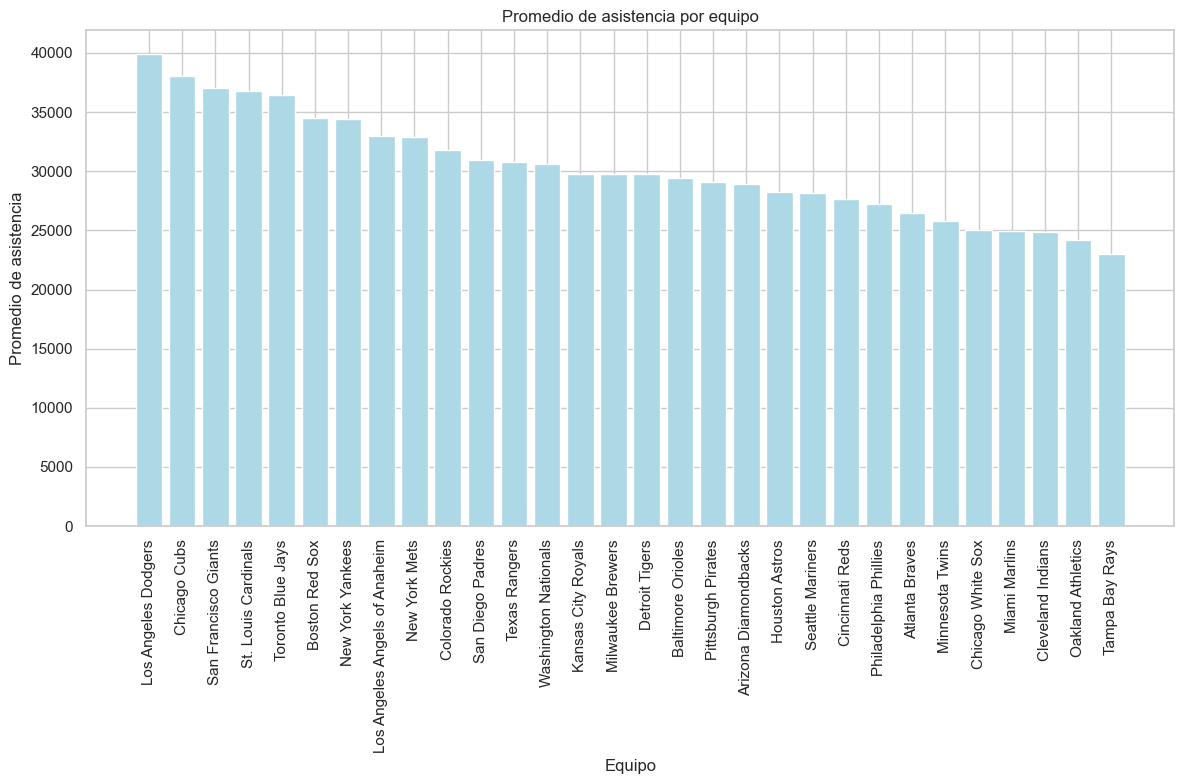

In [32]:
# Promedio de asistencia cuando juega cada equipo

avg_attendance_home = data.groupby('home_team')['attendance'].mean().reset_index(name='avg_attendance_home')
avg_attendance_away = data.groupby('away_team')['attendance'].mean().reset_index(name='avg_attendance_away')

# Renombrar las columnas para que coincidan y puedan ser unificadas fácilmente
avg_attendance_home.rename(columns={'home_team': 'team', 'avg_attendance_home': 'avg_attendance'}, inplace=True)
avg_attendance_away.rename(columns={'away_team': 'team', 'avg_attendance_away': 'avg_attendance'}, inplace=True)

# Combinar los DataFrames
combined = pd.concat([avg_attendance_home, avg_attendance_away])

# Calcular el promedio de carreras por equipo
avg_attendance_per_team = combined.groupby('team')['avg_attendance'].mean().reset_index(name='avg_attendance')

# Ordena los datos por el promedio de carreras para una mejor visualización
avg_attendance_per_team = avg_attendance_per_team.sort_values('avg_attendance', ascending=False)

# Crea una figura y un eje para el gráfico
plt.figure(figsize=(12, 8))

# Gráfico de barras
plt.bar(avg_attendance_per_team['team'], avg_attendance_per_team['avg_attendance'], color='lightblue')

# Títulos y etiquetas
plt.title('Promedio de asistencia por equipo')
plt.xlabel('Equipo')
plt.ylabel('Promedio de asistencia')
plt.xticks(rotation=90) 

# Muestra el gráfico
plt.tight_layout()
plt.show()

### 1.4 Aísle las variables numéricas de las categóricas, haga un análisis de correlación entre las mismas.

In [17]:
# Calcular la matriz de correlación de pearson
correlation_matrix = data.loc[:,["attendance", "away_team_errors", "away_team_hits", "away_team_runs", "home_team_errors", "home_team_hits", "home_team_runs"]].corr(method='pearson')
correlation_matrix

,attendance,away_team_errors,away_team_hits,away_team_runs,home_team_errors,home_team_hits,home_team_runs
attendance,1.000000,0.022747,-0.040539,-0.040271,-0.017339,-0.001118,0.022410
away_team_errors,0.022747,1.000000,0.033057,0.042442,0.024280,0.153876,0.218470
away_team_hits,-0.040539,0.033057,1.000000,0.780760,0.190945,0.114150,0.052616
away_team_runs,-0.040271,0.042442,0.780760,1.000000,0.280002,0.091607,0.038996
home_team_errors,-0.017339,0.024280,0.190945,0.280002,1.000000,-0.007762,-0.008251
home_team_hits,-0.001118,0.153876,0.114150,0.091607,-0.007762,1.000000,0.769776
home_team_runs,0.022410,0.218470,0.052616,0.038996,-0.008251,0.769776,1.000000


### 1.5 Utilice las variables categóricas, haga tablas de frecuencia, proporción, gráficas de barras o cualquier otra técnica que le permita explorar los datos

In [65]:
# Calcular la frecuencia
variable = "venue"
frecuency = data[variable].value_counts()

topValues = frecuency.head(100) # top n

# Reemplazar columna por "otros" para valores fuera del top5
data['topValues'] = data[variable].apply(lambda x: x if x in topValues.index else 'otros')

# Calcular frecuencia para nuevos valores
tabla_frecuencia = data['topValues'].value_counts().reset_index()

tabla_frecuencia.columns = [variable, 'Frecuencia']

#Enviar fila de "otros" al final
otros_row = tabla_frecuencia[tabla_frecuencia[variable] == 'otros']
tabla_frecuencia = tabla_frecuencia[tabla_frecuencia[variable] != 'otros']
tabla_frecuencia = pd.concat([tabla_frecuencia, otros_row])

print(f"     Tabla de frecuencia de variable {variable}")
tabla_frecuencia

     Tabla de frecuencia de variable venue


,venue,Frecuencia
0,: Progressive Field,89
1,: Wrigley Field,89
2,: Dodger Stadium,86
3,: Rogers Centre,86
4,: Nationals Park,84
5,: Globe Life Park in Arlington,83
6,: AT&T Park,83
7,: Fenway Park,82
8,: Kauffman Stadium,81
9,: Citi Field,81


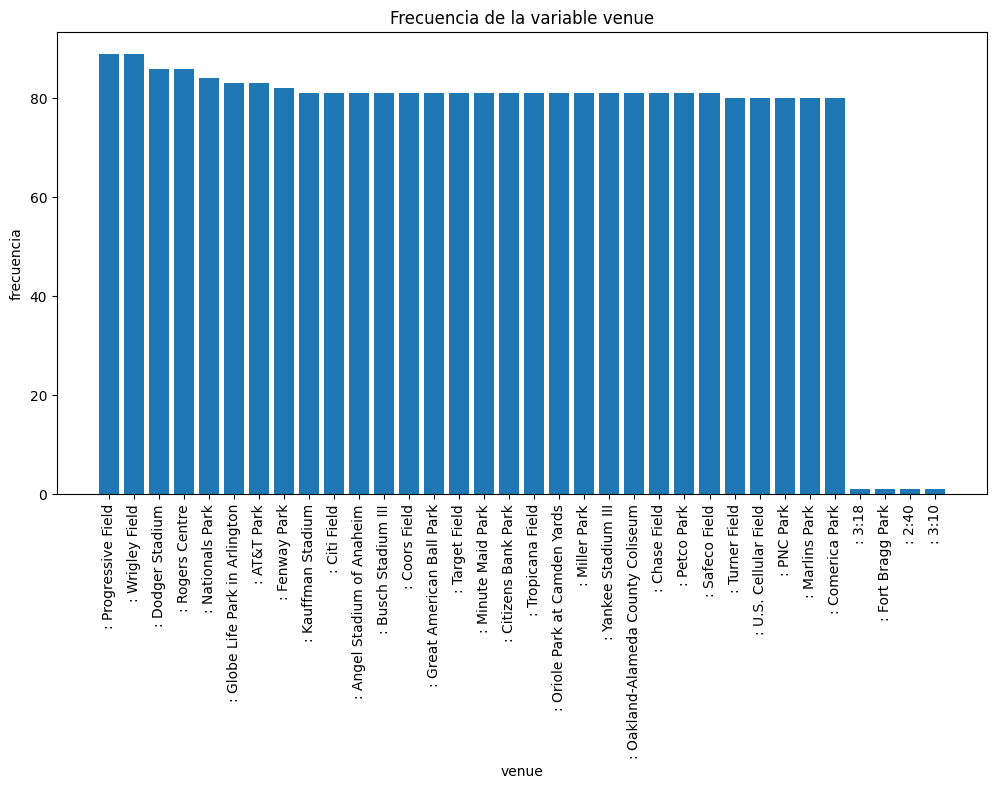

In [66]:
plt.figure(figsize=(12, 6))
plt.bar(tabla_frecuencia[variable], tabla_frecuencia['Frecuencia'])
plt.title(f'Frecuencia de la variable {variable}')
plt.xlabel(variable)
plt.ylabel("frecuencia")
plt.xticks(rotation=90)
plt.show()

### 1.6 Limpieza de datos

In [ ]:

data = pd.read_csv('baseball_reference_2016_scrape.csv')

# Convertir columnas a su tipo de dato correspondiente
data['attendance'] = pd.to_numeric(data['attendance'].str.replace('[^\d]', '', regex=True), errors='coerce')
data['attendance'].fillna(data['attendance'].mean(), inplace=True)

date = pd.to_datetime(data['date'])

# Obtener hora de inicio en formato 24 h
pattern = r'(\d+):(\d+) (a\.m\.|p\.m\.)'
time_extraction = data['start_time'].str.extract(pattern)

hour = time_extraction[0].astype(int)
ampm = time_extraction[2]

hour += 12 * (ampm == 'p.m.') - 12 * (hour == 12)

data["start_hour"] = hour

# Eliminar columnas innecesarias
data.drop(['boxscore_url', 'field_type', 'other_info_string', 'game_duration', 'start_time',
            'date', 'away_team_errors', 'away_team_hits', 'away_team_runs', 'game_type',
            'home_team_errors',	'home_team_hits',	'home_team_runs'], axis=1, inplace=True)

data['month'] = date.dt.month
data['week_day'] = date.dt.dayofweek
data['day'] = date.dt.day
data['year'] = date.dt.year

data['venue'] = data['venue'].str.replace("^: ", "", regex=True)

## Inciso 2

In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [13]:
data.head()

,attendance,away_team,home_team,venue,start_hour,month,week_day,day,year
0,40030.0,New York Mets,Kansas City Royals,Kauffman Stadium,19,4,6,3,2016
1,21621.0,Philadelphia Phillies,Cincinnati Reds,Great American Ball Park,19,4,2,6,2016
2,12622.0,Minnesota Twins,Baltimore Orioles,Oriole Park at Camden Yards,19,4,2,6,2016
3,18531.0,Washington Nationals,Atlanta Braves,Turner Field,19,4,2,6,2016
4,18572.0,Colorado Rockies,Arizona Diamondbacks,Chase Field,12,4,2,6,2016


In [156]:
from ydata_profiling import ProfileReport
profiler = ProfileReport(data)
profiler

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

y = y.reshape(len(y),1)

In [15]:
# Encoder para 'away_team'

encoder_away_team = ColumnTransformer(transformers=[
    ('encoder_away_team', OneHotEncoder(), [-8])
    ], remainder='passthrough', sparse_threshold=0)
X = np.array(encoder_away_team.fit_transform(X))

In [16]:
# Encoder para 'home_team'

encoder_home_team = ColumnTransformer(transformers=[
    ('encoder_home_team', OneHotEncoder(), [-7])
    ], remainder='passthrough', sparse_threshold=0)
X = np.array(encoder_home_team.fit_transform(X))

In [17]:
# Encoder para 'venue'

encoder_venue = ColumnTransformer(transformers=[
    ('encoder_venue', OneHotEncoder(), [-6])
    ], remainder='passthrough', sparse_threshold=0)
X = np.array(encoder_venue.fit_transform(X))

In [18]:
# Dividir conjunto de datos en datos de prueba y datos de entrenamiento 
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size = 1/3, random_state = 0)

### Regresión lineal multiple

In [19]:
regresor_lin = LinearRegression()
regresor_lin.fit(X_entreno, y_entreno)

LinearRegression()

In [21]:
# R-cuadrado utilizando datos de entrenamiento
print(f'R Cuardrado (datos entrenamiento): {regresor_lin.score(X_entreno, y_entreno)}')

R Cuardrado (datos entrenamiento): 0.7126675368038324


In [22]:
# R-cuadrado utilizando datos de prueba
y_pred = regresor_lin.predict(X_prueba)
print(f'R cuadrado (datos de prueba): {r2_score(y_prueba, y_pred)}')

R cuadrado (datos de prueba): 0.6766081410957459


In [23]:
# Coeficientes del modelo
print(f'Coeficientes del modelo:')
print(regresor_lin.coef_)

Coeficientes del modelo:
[[-7.91700427e-13  6.54093696e+03 -1.12549969e-11  5.61004733e+03
   3.97192256e+03  6.11784175e+03 -2.42978296e+03  2.42491500e+03
  -3.58526587e+03  1.43738005e+03  5.44121330e+02  8.09136152e+03
   3.30129090e+03 -1.14676533e+04  2.37116190e+03 -3.79585628e+03
   1.08680865e+03 -4.33066285e+03 -1.08156463e+03 -5.16573747e+02
   3.68494801e+02 -5.27804547e+03 -2.12374349e+03 -1.59924722e+03
  -7.98499208e+02 -4.39544012e+03  6.36438901e+03 -6.54104574e+02
  -2.83325203e+03 -7.34001295e+03  2.96672697e+03 -7.36610910e+03
   4.93739170e+03  3.46102341e+03 -2.42978296e+03 -8.50092637e+03
  -2.12374349e+03  3.30129090e+03  4.93739170e+03 -8.25172142e+02
  -3.79585628e+03 -4.39544012e+03  5.44121330e+02  1.43738005e+03
  -5.16573747e+02  1.08680865e+03  3.97192256e+03  8.09136152e+03
  -4.33066285e+03 -1.08156463e+03 -2.83325203e+03  2.42491500e+03
   3.46102341e+03 -5.27804547e+03 -3.58526587e+03 -1.59924722e+03
  -7.98499208e+02  5.61004733e+03 -6.54104574e+02  

### Regresión polinomial

In [24]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 3)
X_poli = poly_reg.fit_transform(X_entreno)
regresor_pol = LinearRegression()
regresor_pol.fit(X_poli, y_entreno)

LinearRegression()

In [25]:
# R-cuadrado utilizando datos de prueba
y_pred = regresor_pol.predict(poly_reg.transform(X_prueba))
print(f'R cuadrado: {r2_score(y_prueba, y_pred)}')

R cuadrado: -82.71309640194745


In [26]:
# Coeficientes del modelo
print(f'Coeficientes del modelo:')
print(regresor_pol.coef_)

Coeficientes del modelo:
[[ 0.03324211 -0.00815539 -0.01438306 ...  0.07888091  0.00399924
   0.        ]]


### Regresión árbol de decisión

In [15]:
from sklearn.tree import DecisionTreeRegressor
regresor_tree = DecisionTreeRegressor(random_state = 0)
regresor_tree.fit(X_entreno, y_entreno)

DecisionTreeRegressor(random_state=0)

In [16]:
y_pred = regresor_tree.predict(X_prueba)
r2_score(y_prueba, y_pred)

0.6376935893410234

### Regresión random forest

In [21]:
from sklearn.ensemble import RandomForestRegressor
regresor_ranf = RandomForestRegressor(n_estimators = 1000, random_state = 0)
regresor_ranf.fit(X_entreno, y_entreno)

d:\ProgramData\Python311\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=1000, random_state=0)

In [22]:
y_pred = regresor_ranf.predict(X_prueba)
r2_score(y_prueba, y_pred)

0.7992428543130414

### Regresión SVR

In [21]:
# Normalizar datos

from sklearn.preprocessing import StandardScaler
normalizador_X = StandardScaler()
normalizador_y = StandardScaler()
X_entreno_norm = normalizador_X.fit_transform(X_entreno)
y_entreno_norm = normalizador_y.fit_transform(y_entreno)

In [22]:
from sklearn.svm import SVR
regresor_svr = SVR()
regresor_svr.fit(X_entreno_norm, y_entreno_norm)

d:\ProgramData\Python311\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [23]:
y_pred = normalizador_y.inverse_transform(regresor_svr.predict(normalizador_X.transform(X_prueba)).reshape(-1,1))
r2_score(y_prueba, y_pred)

0.7007357402893651

### Predecir datos

In [40]:
# away_team	home_team,	venue,	start_hour,	month,	week_day,	day	year
val = encoder_away_team.transform([["New York Mets",	"Kansas City Royals",	"Kauffman Stadium",	22,	4,	3,	3,	2024]])
val = encoder_home_team.transform(val)
val = encoder_venue.transform(val)

regresor_ranf.predict(val)

array([35134.907])